In [1]:
%run PlottingSetup.ipynb
%matplotlib inline

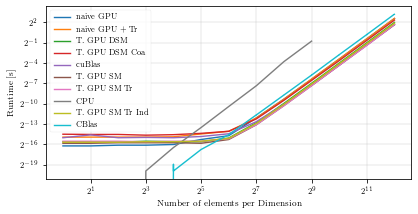

In [140]:
filename='matMulTimesOnDev_4096.txt'
# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='matMulTimesCBlas.txt'
# import data
dataCblas = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

th_data=data[data[:,1]==1024]
th_data[:,9][th_data[:,9]>10**3]=np.nan
th_n=th_data[:,0]

fig, ax = plt.subplots()

# plot functions, time
ax.plot(th_n,th_data[:,2],label='naive GPU')
ax.plot(th_n,th_data[:,3],label='naive GPU + Tr')
ax.plot(th_n,th_data[:,4],label='T. GPU DSM')
ax.plot(th_n,th_data[:,5],label='T. GPU DSM Coa')
ax.plot(th_n,th_data[:,6],label='cuBlas')
ax.plot(th_n,th_data[:,7],label='T. GPU SM')
ax.plot(th_n,th_data[:,8],label='T. GPU SM Tr')
ax.plot(th_n,th_data[:,9],label='CPU')
ax.plot(th_n,th_data[:,10],label='T. GPU SM Tr Ind')
ax.plot(dataCblas[:,0],dataCblas[:,1],label='CBlas')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of elements per Dimension')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)

fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/2)
plt.subplots_adjust(wspace = 0.3,hspace=.2,left=.1)
save('matMulRuntimesonDev')

/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


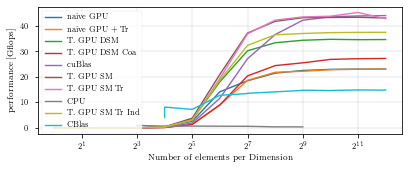

In [141]:
fig, ax = plt.subplots()

# plot functions, performance
ax.plot(th_n,2*th_n**3/th_data[:,2]/1e9,label='naive GPU')
ax.plot(th_n,2*th_n**3/th_data[:,3]/1e9,label='naive GPU + Tr')
ax.plot(th_n,2*th_n**3/th_data[:,4]/1e9,label='T. GPU DSM')
ax.plot(th_n,2*th_n**3/th_data[:,5]/1e9,label='T. GPU DSM Coa')
ax.plot(th_n,2*th_n**3/th_data[:,6]/1e9,label='cuBlas')
ax.plot(th_n,2*th_n**3/th_data[:,7]/1e9,label='T. GPU SM')
ax.plot(th_n,2*th_n**3/th_data[:,8]/1e9,label='T. GPU SM Tr')
plt.plot(th_n,2*th_n**3/th_data[:,9]/1e9,label='CPU')
ax.plot(th_n,2*th_n**3/th_data[:,10]/1e9,label='T. GPU SM Tr Ind')

plt.plot(dataCblas[:,0],2*dataCblas[:,0]**3/dataCblas[:,1]/1e9,label='CBlas')


ax.set_ylabel('performance [Gflops]')
ax.set_xlabel('Number of elements per Dimension')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/2.5)
plt.subplots_adjust(wspace = 0.3,bottom=.2,left=.1)
save('matMulPerformanceonDev')


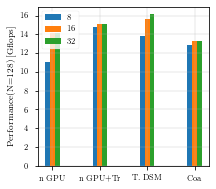

In [142]:
data = np.genfromtxt('matMulTimes.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

N=2**7
labels = ['n GPU','n GPU+Tr','T. DSM','Coa']
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots()

for idx,n_th in enumerate([64, 256, 1024]):
    ax.bar(x - width + idx*width, 2*N**3/data[(data[:,1]==n_th) & (data[:,0]==N)][0,2:6]/1e9, width, label=str(int(np.sqrt(n_th))))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance(N=128) [Gflops]')
# ax.set_title('Performance dependent on Blocksize (N='+str(N)+')')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(lw=.3)

fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(wspace = 0.3,hspace=.2,left=.15,bottom=.2)
save('matMulTHpBInfluenceonDev')


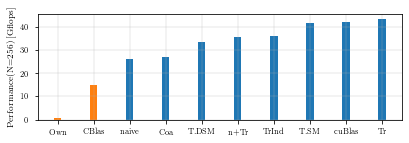

In [143]:
N=data[-1,0]
labels = ['CPU','CBlas','naive','n+Tr','T.DSM','Coa','cuBlas','T.SM','Tr','TrInd']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()

n_th=1024
gpu_idx=[i for i in range(2,11) if i!=9]
order=np.argsort(1/data[(data[:,1]==n_th)][-1,gpu_idx])
ax.bar(x[2:10], 2*N**3/data[(data[:,1]==n_th)][-1,gpu_idx][order]/1e9, width)

cpudata=data[(data[:,9] <10**3) & (data[:,1]==n_th)][-1]
ax.bar(x[:2],  [2*cpudata[0]**3/cpudata[9]/1e9  , 2*dataCblas[-1,0]**3/dataCblas[-1,1]/1e9], width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance(N=256) [Gflops]')
# ax.set_title('Performance dependent on Blocksize (N='+str(N)+')')
ax.set_xticks(x)
ax.set_xticklabels(['Own','CBlas']+list(np.array(labels)[2:10][order]))
ax.grid(lw=.3)

fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,left=.1,bottom=.2)
save('matMulPerfComponDev')

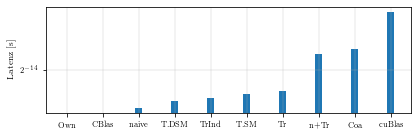

In [144]:
labels = ['CPU','CBlas','naive','n+Tr','T.DSM','Coa','cuBlas','T.SM','Tr','TrInd']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()

gpu_idx=[i for i in range(2,11) if i!=9]
order=np.argsort(data[(data[:,1]==n_th)][0,gpu_idx])
n_th=1024
ax.bar(x[2:10], data[(data[:,1]==n_th)][0,gpu_idx][order], width)

cpudata=data[(data[:,9] <10**3) & (data[:,1]==n_th)][0]
ax.bar(x[:2],  [cpudata[9] , dataCblas[0,1]], width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latenz [s]')
# ax.set_title('Performance dependent on Blocksize (N='+str(N)+')')
ax.set_xticks(x)
ax.set_xticklabels(['Own','CBlas']+list(np.array(labels)[2:10][order]))
ax.grid(lw=.3)
ax.set_yscale('log',basey=2)

fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,left=.1,bottom=.2)
save('matMulLatenzonDev')

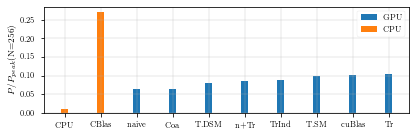

In [145]:
N=data[-1,0]
n_th=1024
cpudata=data[(data[:,9] <10**3) & (data[:,1]==n_th)][-1]
width = 0.2  # the width of the bars
P_CPU=54.4
P_GPU=415

labels = np.array(['CPU','CBlas','naive','n+Tr','T.DSM','Coa','cuBlas','T.SM','Tr','TrInd'])
gpu_idx=[i for i in range(2,11) if i!=9]
gpudata_perf=list(2*N**3/data[(data[:,1]==n_th)][-1,gpu_idx]/1e9)
cpu_and_CBlas_perf=[2*cpudata[0]**3/cpudata[9]/1e9  , 2*dataCblas[-1,0]**3/dataCblas[-1,1]/1e9]
perf_data=np.array(cpu_and_CBlas_perf+gpudata_perf)
labels_sorted=labels[np.argsort(perf_data)]

comp_to_max_perf=perf_data[np.argsort(perf_data)]
comp_to_max_perf[:2]=comp_to_max_perf[:2]/P_CPU
comp_to_max_perf[2:]=comp_to_max_perf[2:]/P_GPU

fig, ax = plt.subplots()
x=np.arange(len(labels_sorted))
ax.bar(x[2:],comp_to_max_perf[2:],width,label='GPU')
ax.bar(x[:2],comp_to_max_perf[:2],width,label='CPU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$P/P_{peak}$(N=256)')
ax.set_xticks(x)
ax.set_xticklabels(labels_sorted)
ax.grid(lw=.3)
fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,left=.1,bottom=.2)
plt.legend()
save('matMulPComponDev')

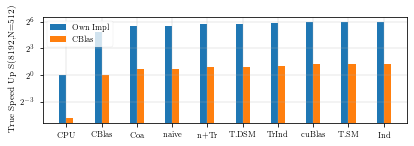

In [146]:
N=data[-1,0]
n_th=1024
cpudata=data[(data[:,9] <10**3) & (data[:,1]==n_th)][-1]
width = 0.2  # the width of the bars

labels = np.array(['CPU','CBlas','naive','n+Tr','T.DSM','Coa','cuBlas','T.SM','Ind','TrInd'])
gpu_idx=[i for i in range(2,11) if i!=9]
gpudata_perf=list(2*N**3/data[(data[:,1]==n_th)&(data[:,0]==cpudata[0])][-1,gpu_idx]/1e9)
cpu_and_CBlas_perf=[2*cpudata[0]**3/cpudata[9]/1e9  , 2*dataCblas[-1,0]**3/dataCblas[-1,1]/1e9]
perf_data=np.array(cpu_and_CBlas_perf+gpudata_perf)
labels_sorted=labels[np.argsort(perf_data)]

gpudata_times=list(data[(data[:,1]==n_th) &(data[:,0]==cpudata[0])][-1,gpu_idx])
cpu_and_CBlas_times=[cpudata[9]  ,dataCblas[dataCblas[:,0]==cpudata[0]][-1,1]]
times_data=np.array(cpu_and_CBlas_times+gpudata_times)
order=np.flip(np.argsort(times_data))
labels_sorted=labels[order]


fig, ax = plt.subplots()
x=np.arange(len(labels))
ax.bar(x-width/2, times_data[order][0]/times_data[order], width,label='Own Impl')
ax.bar(x+width/2, times_data[order][1]/times_data[order], width,label='CBlas')

true_speedup=times_data[order][0]/times_data[order]
n_thread=((np.ceil(512/32))**2)*32

ax.set_ylabel('True Speed Up S('+str(int(n_thread))+',N=512)')
# ax.set_title('Performance dependent on Blocksize (N='+str(N)+')')
ax.set_xticks(x)
ax.set_xticklabels(labels_sorted)
ax.set_yscale('log',basey=2)
ax.grid(lw=.3)
fig.tight_layout()
fig.set_size_inches(w=width_latex,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,left=.1,bottom=.2)
plt.legend()
save('matMulTrueSpeedUponDev')

array([262144., 262144., 262144.])

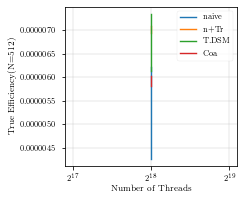

In [147]:
N=2**9
labels = np.array(['naive','n+Tr','T.DSM','Coa'])
columns=[2,3,4,5]

fig, ax = plt.subplots()

cpudata=data[(data[:,9] <10**3) & (data[:,0]==N)]
gpudata_times=data[data[:,0]==N]
cpu_and_CBlas_times=np.array([cpudata[:,9]  ,dataCblas[dataCblas[:,0]==N][:,1]])

n_thread=((np.ceil(N/np.sqrt(gpudata_times[:,1])))**2)*gpudata_times[:,1]

for i in [0,1,2,3]:
    ax.plot(n_thread,cpu_and_CBlas_times[1,:].min()/gpudata_times[:,columns[i]]/n_thread,label=labels[i])

ax.set_xscale('log',basex=2)
ax.set_ylabel('True Efficiency(N=512)')
ax.set_xlabel('Number of Threads')
ax.grid(lw=.3)
ax.legend()

fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(wspace = 0.3,hspace=.2,left=.15,bottom=.2)
save('matMulTrueEfficiencyonDev')
n_thread

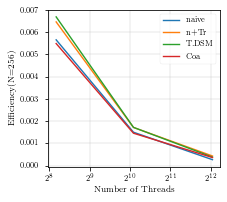

In [148]:
data = np.genfromtxt('matMulTimes.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

N=2**9
labels = np.array(['naive','n+Tr','T.DSM','Coa'])
columns=[2,3,4,5]

fig, ax = plt.subplots()

cpudata=data[(data[:,9] <10**3) & (data[:,0]==N)]
gpudata_times=data[data[:,0]==N]
cpu_and_CBlas_times=np.array([cpudata[:,9]  ,dataCblas[dataCblas[:,0]==N][:,1]])

n_thread=((N+np.sqrt(gpudata_times[:,1])-1)/np.sqrt(gpudata_times[:,1]))**2

for i in [0,1,2,3]:
    ax.plot(n_thread,cpu_and_CBlas_times[1,:].min()/gpudata_times[:,columns[i]]/n_thread,label=labels[i])

ax.set_xscale('log',basex=2)
ax.set_ylabel('Efficiency(N=256)')
ax.set_xlabel('Number of Threads')
ax.grid(lw=.3)
ax.legend()

fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(wspace = 0.3,hspace=.2,left=.15,bottom=.2)
save('matMulEfficiencyonDev')

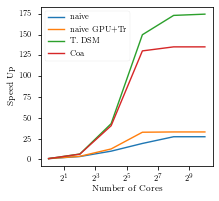

In [10]:
filename='matMulTimesdt1th.txt'
# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

N=2**7
labels = ['naive GPU','naive GPU+Tr','T. DSM','Coa']
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots()

data256=data[data[:,0]==256]
n_blocks=((data256[:,0]+np.sqrt(data256[:,1]).astype(int)-1)/np.sqrt(data256[:,1]).astype(int)).astype(int)**2
ax.plot(data256[:,1],data256[0,2]/data256[:,2],label='naive')
ax.plot(data256[:,1],data256[0,3]/data256[:,3],label='naive GPU+Tr')
ax.plot(data256[:,1],data256[0,4]/data256[:,4],label='T. DSM')
ax.plot(data256[:,1],data256[0,5]/data256[:,5],label='Coa')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Speed Up')
ax.set_xlabel('Number of Cores')

# ax.set_title('Performance dependent on Blocksize (N='+str(N)+')')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax.legend()
ax.set_xscale('log',basex=2)

fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(wspace = 0.3,hspace=.2,left=.15,bottom=.2)

save('matMulSpeedUponDev')


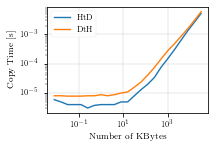

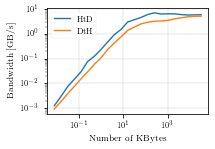

In [31]:
filename='copying.txt'
# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

nKBytes=data[:,0]*8/1024

# plot functions, performance
ax.plot(nKBytes,data[:,1],label='HtD')
ax.plot(nKBytes,data[:,2],label='DtH')


ax.set_ylabel('Copy Time [s]')
ax.set_xlabel('Number of KBytes')
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_yscale('log',basey=10)
ax.grid(lw=.3)
fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,bottom=.2,left=.2)
save('CopyTime')

fig, ax = plt.subplots()

# plot functions, performance
ax.plot(nKBytes,nKBytes/data[:,1]/1024/1024,label='HtD')
ax.plot(nKBytes,nKBytes/data[:,2]/1024/1024,label='DtH')


ax.set_ylabel('Bandwidth [GB/s]')
ax.set_xlabel('Number of KBytes')
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_yscale('log',basey=10)
ax.grid(lw=.3)
fig.tight_layout()
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(wspace = 0.3,bottom=.2,left=.2)
save('CopyBandWith')